# KNN Classifier

In [5]:
import cv2 # for resizing the image #cv2.resize() is used
import os # for walking through the dataset
import numpy as np # for improving performance of Math Calculations
from IPython.display import clear_output # To avoid printing excess of output data #clear_output() is used
import pdb # For debugging if required
import matplotlib.pyplot as plt # for plotting the images if required

## Dividing dataset and convert images into labelled data vectors

In [7]:
##################################################################
#Training Dataset  : 2100 Images(700 Dogs + 700 Cats + 700 Pandas)
#Validation Dataset:  300 Images(100 Dogs + 100 Cats + 100 Pandas)
#Testing Dataset   :  600 Images(200 Dogs + 200 Cats + 200 Pandas)
##################################################################
path = '/home/chgu0615/Desktop/Neural Networks/Homework1/Animals'
trainingDataVector = dict()
validateDataVector = dict()
testDataVector     = dict()

for (dirpath, dirnames, filenames) in os.walk(path): # Walks through all the files under Animals Directory
    count=0
    for filename in filenames:
        if filename.endswith('.jpg'): # Exclude folder names and other files not ending with .jpg if any
            imageFile = (os.path.join(dirpath, filename))
            img = cv2.resize(cv2.imread(imageFile), (32,32))
            # Converting Image(3 dimensional matrix) to a row vector(1 dimensional list with appended label)
            # Resized Image Dimensions = 32*32*3 = 3072
            # Data Vector Dimensions = 1row X (3072Columns for Pixel Values + 1 Column for Labelling)
            # Labels: Dog - 'd', Cat - 'c', Panda - 'p'
            
            if count < 700: # Pick 700 Dogs, 700 Cats, 700 Pandas. Randomly(os.walk does'nt follow any order)
                #Training Dataset - 70% of Data
                trainingDataVector[imageFile] = np.array([])
                for i in range(0,len(img)):
                    for j in range(0,len(img[0])):
                        for k in range(0,len(img[0][0])):
                            trainingDataVector[imageFile] = (np.append(trainingDataVector[imageFile], img[i][j][k]))
                if filename[0] == 'd':
                    trainingDataVector[imageFile] = np.append(trainingDataVector[imageFile], 'd')#Dog Label
                elif filename[0] == 'c':
                    trainingDataVector[imageFile] = np.append(trainingDataVector[imageFile], 'c')#Cat Label
                elif filename[0] == 'p':
                    trainingDataVector[imageFile] = np.append(trainingDataVector[imageFile], 'p')#Panda Label
            elif count < 800: # Pick 100 Dogs, 100 Cats, 100 Pandas
                # Validation Dataset - 10% of Data
                validateDataVector[imageFile] = np.array([])
                for i in range(0,len(img)):
                    for j in range(0,len(img[0])):
                        for k in range(0,len(img[0][0])):
                            validateDataVector[imageFile] = (np.append(validateDataVector[imageFile], img[i][j][k]))
                if filename[0] == 'd':
                    validateDataVector[imageFile] = np.append(validateDataVector[imageFile], 'd')#Dog Label
                elif filename[0] == 'c':
                    validateDataVector[imageFile] = np.append(validateDataVector[imageFile], 'c')#Cat Label
                elif filename[0] == 'p':
                    validateDataVector[imageFile] = np.append(validateDataVector[imageFile], 'p')#Panda Label
            else: # Pick 200 Dogs, 200 Cats, 200 Pandas
                # Testing Dataset - 20% of Data
                testDataVector[imageFile] = np.array([])
                for i in range(0,len(img)):
                    for j in range(0,len(img[0])):
                        for k in range(0,len(img[0][0])):
                            testDataVector[imageFile] = np.append(testDataVector[imageFile], img[i][j][k])
                if filename[0] == 'd':
                    testDataVector[imageFile] = np.append(testDataVector[imageFile], 'd')#Dog Label
                elif filename[0] == 'c':
                    testDataVector[imageFile] = np.append(testDataVector[imageFile], 'c')#Cat Label
                elif filename[0] == 'p':
                    testDataVector[imageFile] = np.append(testDataVector[imageFile], 'p')#Panda Label
            count+=1

In [8]:
#Function to calculate Distance and predict the label
def KNNPredictLabel(K,img):
    '''
        Takes value of K and an Image as input
        Computes distance between input image and 2100 images of training dataset
        Picks best K distances and respective labels
        Predicts label of Input image. Prediccted Label = Label that appears most in the above best K images
    '''
    #img = validateDataVector[testImg]
    L1Dist = dict()
    
    #Calculate L1 Distances
    for imageFile in trainingDataVector.keys():
        L1Dist[imageFile] = np.sum(np.abs(np.asarray(img[0:len(img)-1],dtype = float) - 
                                          np.asarray(trainingDataVector[imageFile][0:len(img)-1],dtype = float)
                                         )
                                  )
    
    #########################################################
    #Pick best K Distances and find the class that appears most of the times
    #Predicted Class = Class that appears maximum number of times in KNNList
    
    KNNList = [] #Format of list = [[Distance,label],[Distance,label],[Distance,label] ...]
    for i in range(0,K):
        KNNList.append([10**10+i,''])
    for imageFile in trainingDataVector.keys():
        for rank in range(0,len(KNNList)):
            if KNNList[rank][0] > L1Dist[imageFile]:
                KNNList = (KNNList[0:rank] + 
                           [[L1Dist[imageFile],trainingDataVector[imageFile][3072]]] + 
                           KNNList[rank:len(KNNList) - 1])
                break
           
    #########################################################
    score = {'d':0,'c':0,'p':0}
    for k in KNNList:
        score[k[1]] += 1
        
    #########################################################
    maxVal = 0
    for i in score.keys():
        if score[i] > maxVal:
            maxVal = score[i]
            predictedLabel = i
    return predictedLabel

In [9]:
#Prepare Confusion Matrix
ConfusionMatrix = {10 :0,
                  40 :0,
                  70 :0,
                  100:0,
                  120:0,
                  130:0,
                  140:0,
                  160:0,
                  200:0,
                  250:0,
                  320:0,
                  350:0,
                  400:0,
                  450:0}

for K in ConfusionMatrix.keys():
    sameCount = 0 # True Positive # Act = Pred
    diffCount = 0 # Count of everything except True Positive
    
    score = {'d':{'d':0,'c':0,'p':0},
             'c':{'d':0,'c':0,'p':0},
             'p':{'d':0,'c':0,'p':0}}
    
    for imgFile in validateDataVector.keys():
        predClass = KNNPredictLabel(K,validateDataVector[imgFile])
        actualClass = os.path.split(imgFile)[1][0]
        
        score[actualClass][predClass] += 1
        
        if predClass == actualClass:
            sameCount += 1
        else:
            diffCount += 1
        
        clear_output()
        print('Value of K = ',K)
        print('Image Index: ', (sameCount + diffCount))
        print('Name of the file: ',imgFile)
        print('Pred: ',predClass, 'actualClass: ',actualClass)
        print('Modified Accuracy percentage: ',sameCount*100/(sameCount + diffCount))
        print('*******************************************************')

    ConfusionMatrix[K] = score

clear_output()
print('ConfusionMatrix:')
print('================')
print(ConfusionMatrix)

ConfusionMatrix:
{320: {'p': {'p': 53, 'c': 22, 'd': 25}, 'c': {'p': 7, 'c': 56, 'd': 37}, 'd': {'p': 3, 'c': 35, 'd': 62}}, 130: {'p': {'p': 48, 'c': 28, 'd': 24}, 'c': {'p': 6, 'c': 70, 'd': 24}, 'd': {'p': 1, 'c': 52, 'd': 47}}, 70: {'p': {'p': 48, 'c': 33, 'd': 19}, 'c': {'p': 6, 'c': 71, 'd': 23}, 'd': {'p': 1, 'c': 51, 'd': 48}}, 200: {'p': {'p': 49, 'c': 27, 'd': 24}, 'c': {'p': 7, 'c': 66, 'd': 27}, 'd': {'p': 2, 'c': 43, 'd': 55}}, 10: {'p': {'p': 37, 'c': 37, 'd': 26}, 'c': {'p': 7, 'c': 72, 'd': 21}, 'd': {'p': 0, 'c': 58, 'd': 42}}, 140: {'p': {'p': 49, 'c': 25, 'd': 26}, 'c': {'p': 6, 'c': 69, 'd': 25}, 'd': {'p': 1, 'c': 49, 'd': 50}}, 450: {'p': {'p': 56, 'c': 16, 'd': 28}, 'c': {'p': 9, 'c': 47, 'd': 44}, 'd': {'p': 6, 'c': 24, 'd': 70}}, 400: {'p': {'p': 55, 'c': 22, 'd': 23}, 'c': {'p': 7, 'c': 53, 'd': 40}, 'd': {'p': 5, 'c': 31, 'd': 64}}, 350: {'p': {'p': 53, 'c': 20, 'd': 27}, 'c': {'p': 7, 'c': 57, 'd': 36}, 'd': {'p': 3, 'c': 32, 'd': 65}}, 160: {'p': {'p': 47, 

In [15]:
#function to Calculate a,b,c,d
def CalculateABCD(matrix):
    A = {'c':None, 'd':None, 'p':None} 
    B = {'c':None, 'd':None, 'p':None}
    C = {'c':None, 'd':None, 'p':None}
    D = {'c':None, 'd':None, 'p':None}
    
    #Cats
    A['c'] = matrix['c']['c'] #--------------------#TP
    B['c'] = matrix['c']['d'] + matrix['c']['p']   #FN
    C['c'] = matrix['d']['c'] + matrix['p']['c']   #FP
    D['c'] =(matrix['d']['d'] + matrix['d']['p'] + 
             matrix['p']['d'] + matrix['p']['p'])  #TN
    
    #Dogs
    A['d'] = matrix['d']['d'] #--------------------#TP
    B['d'] = matrix['d']['c'] + matrix['d']['p']   #FN
    C['d'] = matrix['c']['d'] + matrix['p']['d']   #FP
    D['d'] =(matrix['c']['c'] + matrix['c']['p'] + 
             matrix['p']['c'] + matrix['p']['p'])  #TN
    
    #Pandas
    A['p'] = matrix['p']['p'] #--------------------#TP
    B['p'] = matrix['p']['c'] + matrix['p']['d']   #FN
    C['p'] = matrix['c']['p'] + matrix['d']['p']   #FP
    D['p'] =(matrix['c']['c'] + matrix['c']['d'] + 
             matrix['d']['c'] + matrix['d']['d'])  #TN
    
    return (A,B,C,D)

def plotConfusionMatrix(ConfusionMatrix):
    Sum = (ConfusionMatrix['p']['p'] + ConfusionMatrix['p']['c'] + ConfusionMatrix['p']['d'])*1.0
    cm_List = [
        [ConfusionMatrix['p']['p']/Sum,ConfusionMatrix['p']['c']/Sum,ConfusionMatrix['p']['d']/Sum],
        [ConfusionMatrix['c']['p']/Sum,ConfusionMatrix['c']['c']/Sum,ConfusionMatrix['c']['d']/Sum],
        [ConfusionMatrix['d']['p']/Sum,ConfusionMatrix['d']['c']/Sum,ConfusionMatrix['d']['d']/Sum]
    ]
    plt.imshow(cm_List, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 1.0)
    plt.colorbar()
    classes = ['Panda','Cat','Dog']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i in range(0,len(cm_List)):
        for j in range(0,len(cm_List[0])):
            plt.text(j, i, format(cm_List[i][j], '.2f'),
                     horizontalalignment="center",
                     color="black")

In [11]:
#Calculate Accuracy
#Pick the K having better accuracy
A = {key : 0 for key in ConfusionMatrix.keys()}
B = {key : 0 for key in ConfusionMatrix.keys()}
C = {key : 0 for key in ConfusionMatrix.keys()}
D = {key : 0 for key in ConfusionMatrix.keys()}

Accuracy = {key: {'d':None, 'c':None, 'p':None} for key in ConfusionMatrix.keys()}
AverageAccuracy = {key : 0 for key in ConfusionMatrix.keys()}

for K in ConfusionMatrix.keys():
    A[K],B[K],C[K],D[K] = CalculateABCD(ConfusionMatrix[K])
    avg = 0
    for animal in Accuracy[K].keys():
        Accuracy[K][animal] = (A[K][animal]+D[K][animal])*1.0/(A[K][animal]+B[K][animal]+C[K][animal]+D[K][animal])
        avg += Accuracy[K][animal]
    AverageAccuracy[K] = avg*100/3.0; avg = 0

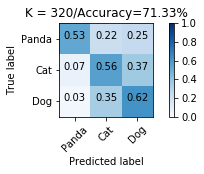

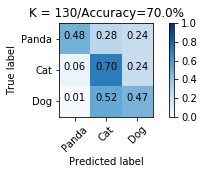

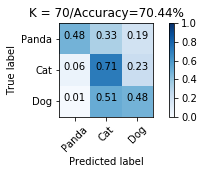

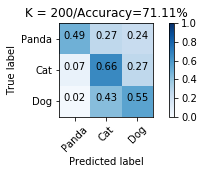

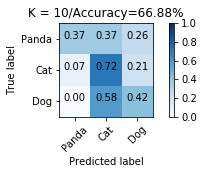

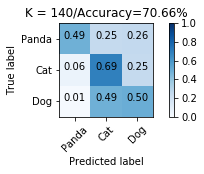

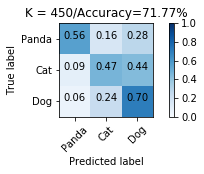

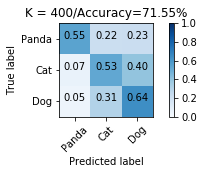

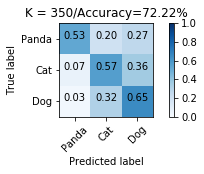

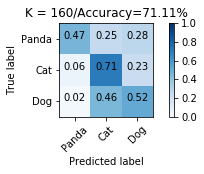

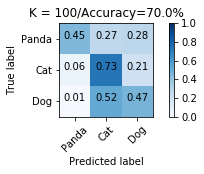

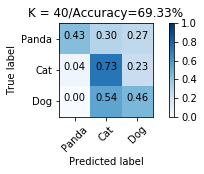

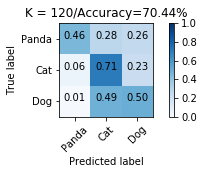

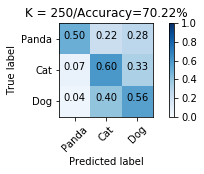

In [17]:
#Plot Confusuion Matrix for all Ks and Show Accuracy for each K
i = 1
for key in ConfusionMatrix.keys():
    plt.figure(figsize = (20,10))
    plt.subplot(5,3,i); i+=1
    plt.title('K = '+str(key)+'/Accuracy='+str(AverageAccuracy[key])[0:5]+'%')
    plotConfusionMatrix(ConfusionMatrix[key])

In [13]:
AverageAccuracy

{10: 66.8888888888889,
 40: 69.33333333333333,
 70: 70.44444444444444,
 100: 70.0,
 120: 70.44444444444444,
 130: 69.99999999999999,
 140: 70.66666666666667,
 160: 71.11111111111111,
 200: 71.11111111111111,
 250: 70.22222222222221,
 320: 71.33333333333333,
 350: 72.22222222222223,
 400: 71.55555555555556,
 450: 71.77777777777779}

## Hence K = 350 gives maximum accuracy 

In [14]:
#Test
ConfusionMatrix = {350:0}

for K in ConfusionMatrix.keys():
    sameCount = 0 # True Positive # Act = Pred
    diffCount = 0 # Count of everything except True Positive
    
    score = {'d':{'d':0,'c':0,'p':0},
             'c':{'d':0,'c':0,'p':0},
             'p':{'d':0,'c':0,'p':0}}
    
    for imgFile in testDataVector.keys():
        predClass = KNNPredictLabel(K,testDataVector[imgFile])
        actualClass = os.path.split(imgFile)[1][0]
        
        score[actualClass][predClass] += 1
        
        if predClass == actualClass:
            sameCount += 1
        else:
            diffCount += 1
        
        clear_output()
        print('Value of K = ',K)
        print('Image Index: ', (sameCount + diffCount))
        print('Name of the file: ',imgFile)
        print('Pred: ',predClass, 'actualClass: ',actualClass)
        print('Modified Accuracy percentage: ',sameCount*100/(sameCount + diffCount))
        print('*******************************************************')

    clear_output()
    ConfusionMatrix[K] = score
    print(ConfusionMatrix)

{350: {'p': {'p': 84, 'c': 54, 'd': 62}, 'c': {'p': 15, 'c': 106, 'd': 79}, 'd': {'p': 5, 'c': 79, 'd': 116}}}


Final Accuracy(%):  67.33
Final Precision  :  0.57
Final Recall     :  0.51
Final F-Measure  :  0.51
Confusion Matrix : 


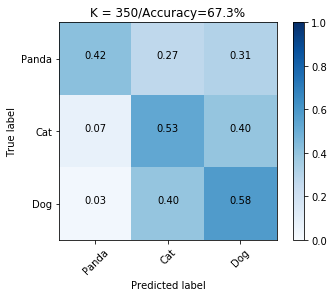

In [20]:
A,B,C,D = CalculateABCD(ConfusionMatrix[350])


Accuracy  = {'c':0, 'd':0, 'p':0}
Precision = {'c':0, 'd':0, 'p':0}
Recall    = {'c':0, 'd':0, 'p':0}
Fmeasure  = {'c':0, 'd':0, 'p':0}

for animal in ['c','d','p']:
    #import pdb; pdb.set_trace()
    Accuracy[animal] = (A[animal] + D[animal])*1.0/(A[animal] + B[animal] + C[animal] + D[animal])
    Precision[animal] = A[animal]*1.0/(A[animal] + C[animal])
    Recall[animal] = A[animal]*1.0/(A[animal] + B[animal])
    Fmeasure[animal] = 2.0*A[animal]/(2*A[animal] + B[animal] + C[animal])
    
finalAccuracy = (Accuracy['c']+Accuracy['d']+Accuracy['p'])*100/3.0
finalPrecision = (Precision['c']+Precision['d']+Precision['p'])/3.0
finalRecall = (Recall['c']+Recall['d']+Recall['p'])/3.0
finalFmeasure = (Fmeasure['c']+Fmeasure['d']+Fmeasure['p'])/3.0

print 'Final Accuracy(%): ',"{0:.2f}".format(finalAccuracy)
print 'Final Precision  : ',"{0:.2f}".format(finalPrecision) 
print 'Final Recall     : ',"{0:.2f}".format(finalRecall)
print 'Final F-Measure  : ',"{0:.2f}".format(finalFmeasure)
print 'Confusion Matrix : '

#Plotting Confusion Matrix
for key in ConfusionMatrix.keys():
    plt.title('K = '+str(key)+'/Accuracy='+str(finalAccuracy)[0:4]+'%')
    plotConfusionMatrix(ConfusionMatrix[key])